In [6]:
import numpy as np

rolls = np.random.choice([1, 2, 3, 4, 5, 6], (10_000, 10))
rolls

array([[3, 4, 4, ..., 3, 3, 3],
       [6, 2, 5, ..., 6, 5, 4],
       [6, 1, 4, ..., 5, 5, 6],
       ...,
       [1, 3, 2, ..., 5, 5, 3],
       [2, 2, 2, ..., 5, 1, 1],
       [3, 4, 6, ..., 6, 5, 6]])

(array([  19.,  140.,  706., 1201., 2610., 2698., 1459.,  922.,  217.,
          28.]),
 array([1.6 , 1.97, 2.34, 2.71, 3.08, 3.45, 3.82, 4.19, 4.56, 4.93, 5.3 ]),
 <a list of 10 Patch objects>)

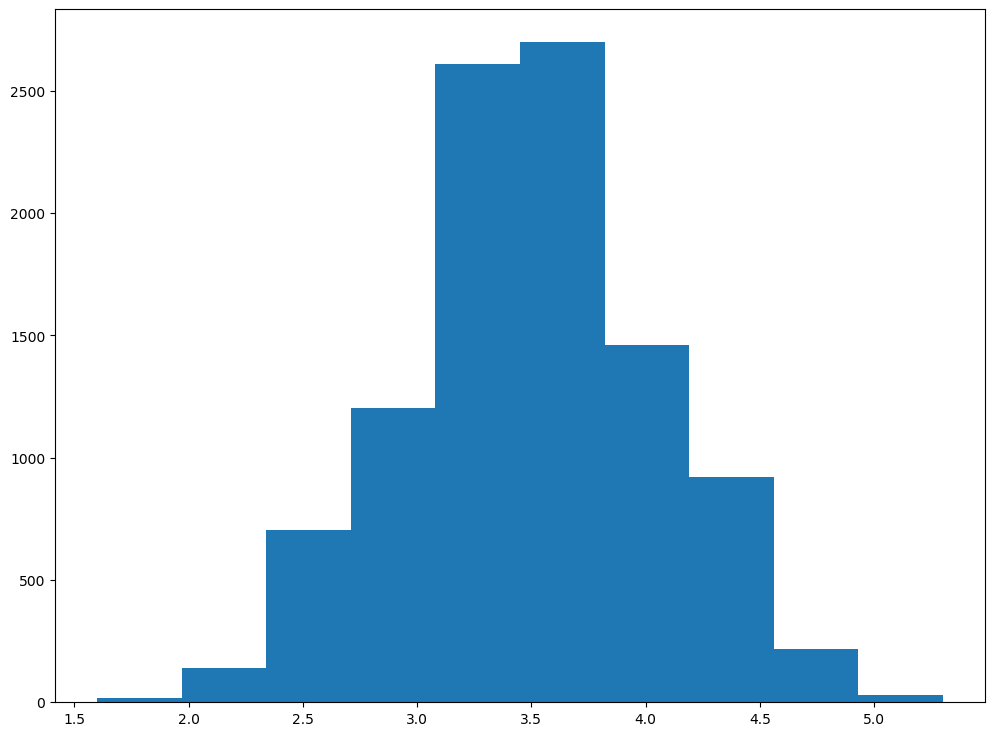

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

avg_of_10_rolls = rolls.mean(axis=1)

plt.hist(avg_of_10_rolls, bins=10)

In [19]:
np.random.seed(7)
n = 15
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n)
rolls

array([5, 2, 4, 4, 5, 2, 1, 2, 3, 3, 1, 5, 1, 5, 1])

In [20]:
rolls.mean()

2.933333333333333

In [21]:
rolls.std()

1.569146972791976

In [22]:
import math

t = (rolls.mean() - 3.5) / (rolls.std() / math.sqrt(n))
t

-1.3986520070493254

In [24]:
from scipy import stats

stats.t(n - 1).cdf(t) * 2

0.18367838344198753

In [28]:
np.random.seed(7)
n = 15

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n)
rolls

array([5, 2, 4, 4, 5, 2, 1, 2, 3, 3, 1, 5, 1, 5, 1])

In [29]:
rolls.mean()

2.933333333333333

In [30]:
rolls.std()

1.569146972791976

In [31]:
t = (rolls.mean() - 4.5) / (rolls.std() / math.sqrt(n))
t

-3.8668614312540166

In [32]:
stats.t(n - 1).cdf(t) * 2

0.0017097713986485858

In [40]:
dist = stats.t(n - 1)
for mean in [2.5, 3, 3.5, 4, 4.5, 5]:
    t = (mean - 4.5) / (rolls.std() / math.sqrt(n))
    p = (dist.cdf(t) if t < 0 else dist.sf(t)) * 2
    print(f'mu = {mean:.1f}, t = {t:.2f}, p = {p:.3f}')

mu = 2.5, t = -4.94, p = 0.000
mu = 3.0, t = -3.70, p = 0.002
mu = 3.5, t = -2.47, p = 0.027
mu = 4.0, t = -1.23, p = 0.237
mu = 4.5, t = 0.00, p = 1.000
mu = 5.0, t = 1.23, p = 0.237


(0, 7)

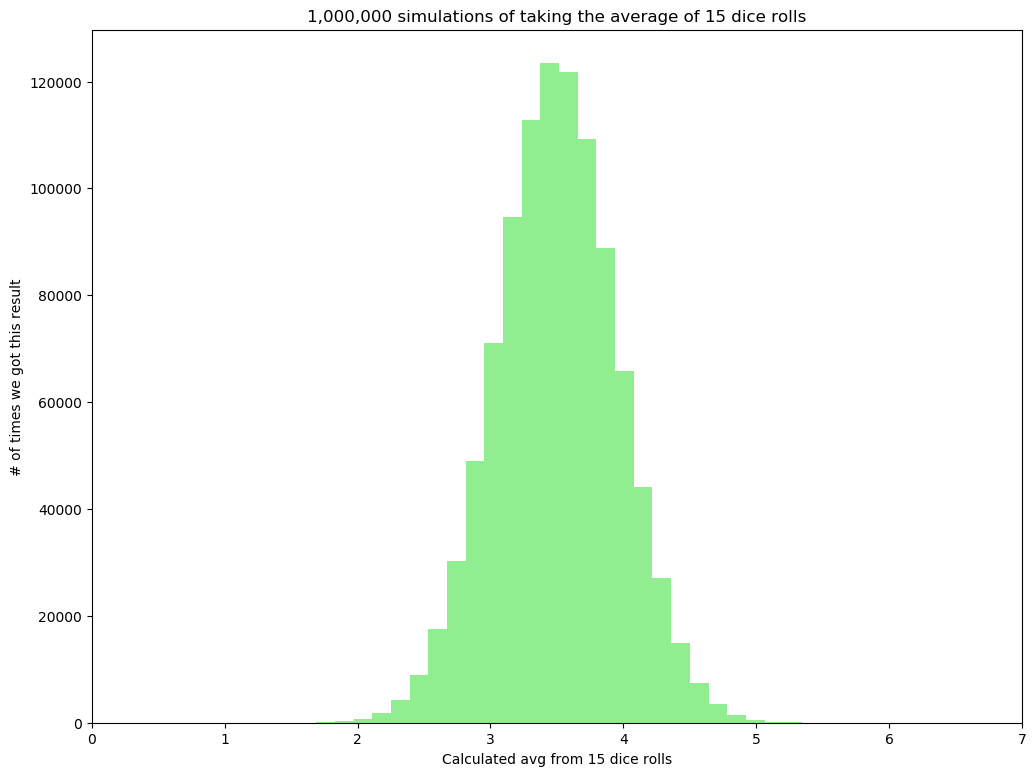

In [70]:
n = 15

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n)

mu = 3.5
xbar = rolls.mean()
s = rolls.std()
se = s / math.sqrt(n)

dist = stats.norm(mu, se)

n_simulations = 1_000_000
simulations = dist.rvs(n_simulations)

plt.hist(simulations, bins=30, color='lightgreen')
plt.title(f'{n_simulations:,} simulations of taking the average of {n} dice rolls')
plt.xlabel(f'Calculated avg from {n} dice rolls')
plt.ylabel('# of times we got this result')
plt.xlim(0, 7)

In [74]:
dist.cdf(1.5) * 2

9.15881085723946e-06

In [78]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT
    s.salary,
    d.dept_name as department
FROM salaries s
JOIN dept_emp de USING (emp_no)
JOIN departments d USING (dept_no)
WHERE de.to_date > NOW()
  AND s.to_date > NOW()
'''

salaries = pd.read_sql(query, url)

In [104]:
salaries

,salary,department
0,64254,Customer Service
1,51326,Customer Service
2,93188,Customer Service
3,98003,Customer Service
4,61070,Customer Service
...,...,...
240119,98388,Sales
240120,107386,Sales
240121,108364,Sales
240122,119906,Sales


In [91]:
avg_salary = salaries.salary.mean()
avg_research_salary = salaries[salaries.department == 'Research'].salary.mean()

print('avg_salary = ', avg_salary)
print('avg_research_salary = ', avg_research_salary)

s = salaries[salaries.department == 'Research'].salary.std()
n = salaries[salaries.department == 'Research'].shape[0]

print('s =', s, 'n =', n)

avg_salary =  72012.23585730705
avg_research_salary =  67913.374975714
s = 14361.658072792277 n = 15441


In [88]:
t = (avg_research_salary - avg_salary) / (s / math.sqrt(n))
t

-35.464701358373766

In [94]:
p = stats.t(n - 1).cdf(t) * 2
p

6.419621391095141e-265

In [96]:
research_salaries = salaries[salaries.department == 'Research'].salary
research_salaries

186982    88070
186983    50032
186984    72668
186985    62218
186986    67156
          ...  
202418    71136
202419    50565
202420    54456
202421    48797
202422    47543
Name: salary, Length: 15441, dtype: int64

In [97]:
avg_salary

72012.23585730705

In [98]:
stats.ttest_1samp(research_salaries, avg_salary)

Ttest_1sampResult(statistic=-35.46470135837385, pvalue=6.41962139107688e-265)

In [100]:
marketing_salaries = salaries[salaries.department == 'Marketing'].salary

In [101]:
stats.ttest_ind(marketing_salaries, research_salaries)

Ttest_indResult(statistic=66.33600258834625, pvalue=0.0)

In [102]:
stats.ttest_ind?

In [103]:
stats.ttest_1samp?